#Bibliotecas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sym
%precision 4
u'%.4f'

'%.4f'

# Métodos

##Eliminação de gauss (sem pivotamento parcial)

In [ ]:
def gauss(A, b):
    U = np.append(A, b, axis=1)  
    n = U.shape[0]

    for i in range(n):
        for j in range(i + 1, n):
            f = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * f

    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            f = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * f

    for i in range(n):
        U[i,n] /= U[i,i]
        U[i,i] /= U[i,i]

    return U[:,n:n+1]

##Fatoração LU

In [ ]:
def solve(L, U, B, r):
   size = len(B)
   y = [0 for _ in range(size)]
   x = [0 for _ in range(size)]
   for _i in range(size):
      y[_i] = B[_i]
      temp_sum = sum(L[_i][_k] * y[_k] for _k in range(_i))
      y[_i] -= temp_sum
   # print(y)
   for _i in range(size-1, -1, -1):
      temp_sum = sum(U[_i][_k] * x[_k] for _k in range(_i+1, size))
      try:
         x[_i] = round(((y[_i] - temp_sum) / U[_i][_i]), r)
         
      except ZeroDivisionError:
         pass
   return x
   
def lu(A):
  size = len(A)

  L = [[0 for _ in range(size)] for _ in range(size)]
  U = [[0 for _ in range(size)] for _ in range(size)]

  for j in range(size):
    L[j][j] = 1

    for i in range(j + 1):
      s1 = sum(U[k][j] * L[i][k] for k in range(i))
      U[i][j] = A[i][j] - s1

    for i in range(j, size):
      s2 = sum(U[k][j] * L[i][k] for k in range(j))
      L[i][j] = (A[i][j] - s2) / U[j][j]
    
  return L, U

##Gauss-Jacobi

In [ ]:
def gauss_jacobi(A, b, iter_max, tol, x=None):
  n = len(A)
  list = []

  if x is None:
    x = np.zeros(len(A[0]))

  v = np.zeros(len(A[0]))

  for iter in range(iter_max):
    for i in range(n):
      sum = 0
      for j in range(n):
        if i != j: 
          sum += A[i, j] * x[j]
      v[i] = (b[i] - sum) / A[i, i]
    norma_nun, norma_den = 0, 0
    for i in range(n):
      t = abs(v[i] - x[i])
      if t > norma_nun: norma_nun = t
      if abs(v[i]) > norma_den: norma_den = abs(v[i])
      x[i] = v[i]
    norma_rel = norma_nun / norma_den
    list.append(x.tolist())
    if norma_rel <= tol: break
  return [list, len(list)]

##Gauss-Seidel

In [ ]:
def gauss_seidel(A, b, iter_max, tol, x=None):
  n = len(A)
  list = []

  if x is None:
        x = np.zeros(len(A[0]))

  v = np.zeros(len(A[0]))

  for iter in range(iter_max):
    norma_nun, norma_den = 0, 0

    for i in range(n):
      sum = 0
      for j in range(n):
        if i != j:
          sum += A[i, j] * x[j]
      v[i] = x[i]
      x[i] = (b[i] - sum) / A[i, i]
      t = abs(v[i] - x[i])

      if t > norma_nun: norma_nun = t
      if abs(x[i]) > norma_den: norma_den = abs(x[i])
    
    norma_rel = norma_nun / norma_den
    list.append(x.tolist())
    if norma_rel <= tol: break
  return [list, len(list)]

# Relatório 2


##Questão 1 –
 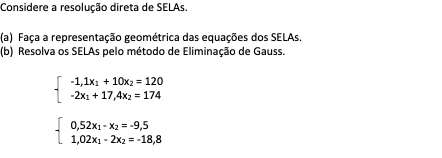

(a) Faça a representação geométrica das equações dos SELAs

-1,1x1 + 10x2 = 120 <br>
-2x1 + 17,4x2 = 174

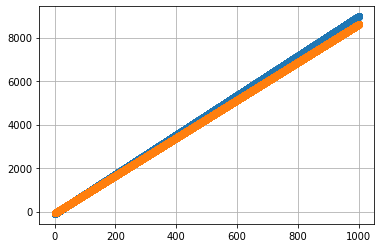

In [ ]:
#Isolei uma das variaveis para conseguir aplicar a função lambda e assim gerar o gráfico da reta
eq1 = lambda x2: -((1200 - 100 * x2) / 11)
eq2 = lambda x2: -((87*(-x2 + 10)) / 10)
curva = np.linspace(0, 1000, 10000)
valores = [eq1(valor) for valor in curva]
valores2 = [eq2(valor) for valor in curva]
plt.plot(curva, valores, linestyle='-', marker='o')
plt.plot(curva, valores2, linestyle='-', marker='o')
plt.grid()
plt.show()


0,52x1 - x2 = -9,5 <br>
1,02x1 - 2x2 = -18,8

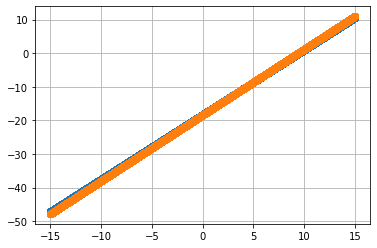

In [ ]:
#Isolei uma das variaveis para conseguir aplicar a função lambda e assim gerar o gráfico da reta
eq1 = lambda x2: (25 * (2 * x2 - 19)) / 26
eq2 = lambda x2: (20 * (5 * x2 - 47)) / 51
curva = np.linspace(-15, 15, 100000)
valores = [eq1(valor) for valor in curva]
valores2 = [eq2(valor) for valor in curva]
plt.plot(curva, valores, linestyle='-', marker='o')
plt.plot(curva, valores2, linestyle='-', marker='o')
plt.grid()
plt.show()

(b) Resolva os SELAs pelo método de Eliminação de Gauss.

-1,1x1 + 10x2 = 120 <br>
-2x1 + 17,4x2 = 174

In [ ]:
A = np.array([[-1.1, 10],
             [-2, 17.4]], dtype='float64')
b = np.array([[120], [174]], dtype='float64')
print('Eliminação de Gauss (sem pivoteamento)\n', gauss(A, b))

Eliminação de Gauss (sem pivoteamento)
 [[404.6512]
 [ 56.5116]]


0,52x1 - x2 = -9,5 <br>
1,02x1 - 2x2 = -18,8

In [ ]:
A = np.array([[0.52, -1],
             [1.02, -2]], dtype='float64')
b = np.array([[-9.5], [-18.8]], dtype='float64')
print('Eliminação de Gauss (sem pivoteamento)\n', gauss(A, b))

Eliminação de Gauss (sem pivoteamento)
 [[-10. ]
 [  4.3]]


##Questão 2 –
 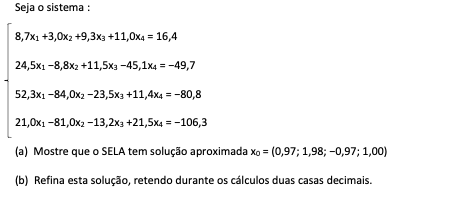

(a) Mostre que o SELA tem solução aproximada x0 = (0,97; 1,98; −0,97; 1,00)

In [ ]:
x = np.array([[0.97],[1.98],[-0.97],[1.00]], dtype='float64')
print("Diferenças entre o valor real da equação e a solução aproximada encontrada através vetor x0: ")
print(abs(16.4 - (8.7 * x[0] + 3.0 * x[1] + 9.3 * x[2] + 11.0 * x[3])))
print(abs(-49.7 - (24.5 * x[0] - 8.8 * x[1] + 11.5 * x[2] - 45.1 * x[3])))
print(abs(-80.8 - (52.3 * x[0] - 84.0 * x[1] - 23.5 * x[2] + 11.4 * x[3])))
print(abs(-106.3 - (21.0 * x[0] - 81.0 * x[1] - 13.2 * x[2] + 21.5 * x[3])))

Diferenças entre o valor real da equação e a solução aproximada encontrada através vetor x0: 
[0.042]
[0.214]
[0.594]
[0.594]


(b) Refina esta solução, retendo durante os cálculos duas casas decimais

In [ ]:
A = np.array([[8.7, 3.0, 9.3, 11.0],
              [24.5, -8.8, 11.5, -45.1],
              [52.3, -84.0, -23.5, 11.4],
              [21.0, -81.00, -13.2, 21.5]], dtype='float64')

b = np.array([16.4, -49.7, -80.8, -106.30], dtype='float64')
L, U = lu(A)
print('Fatoração LU:\n', solve(L, U, b, 2)) #O ultimo parametro é utilizado para reter as casas decimais durante o calculo do vetor solução

Fatoração LU:
 [1.0, 2.0, -1.0, 1.0]


## Questão 3 – 
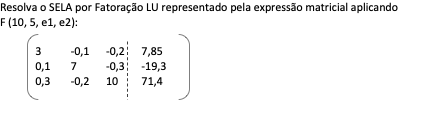

In [ ]:
A = np.array([[3.0, -0.1, -0.2],
              [0.1, 7.0, -0.3],
              [0.3, -0.2, 10]], dtype='float64')

b = np.array([7.85, -19.3, 71.4], dtype='float64')
L, U = lu(A)
print('Fatoração LU:\n', solve(L, U, b, 5))

Fatoração LU:
 [3.0, -2.5, 7.0]


##Questão 4 – 
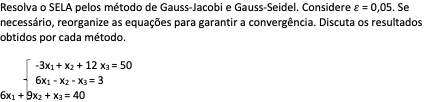

In [ ]:
A = np.array([[-3, 1, 12],
              [6, -1, -1],
              [6, 9, 1]], dtype='float64')

b = np.array([50, 3, 40], dtype='float64')


print('Gauss-Jacobi:\n', gauss_jacobi(A, b, 10, 0.05))
print('Gauss-Seidel:\n', gauss_seidel(A, b, 10, 0.05))

Gauss-Jacobi:
 [[[-16.666666666666668, -3.0, 40.0], [142.33333333333334, -143.0, 167.0], [603.6666666666666, 684.0, 473.0], [2103.3333333333335, 3146.0, -9738.0], [-37920.0, 22355.0, -40894.0], [-156141.0, -186629.0, 26365.0], [43233.666666666664, -963214.0, 2616547.0], [10145100.0, -2357148.0, 8409564.0], [32852523.333333332, 52461033.0, -39656228.0], [-141137917.66666666, 236771365.0, -669264397.0]], 10]
Gauss-Seidel:
 [[[-16.666666666666668, -103.0, 1067.0], [4217.0, 24232.0, -243350.0], [-965339.3333333334, -5548689.0, 55730277.0], [221071528.33333334, 1270698890.0, -12762719140.0], [-50627310280.0, -291001142543.0, 2922774144607.0], [11594096197563.666, 66641803040772.0, -669340804552290.0], [-2655149283862252.5, -1.5261554898621228e+16, 1.532848897907646e+17], [6.080523741968513e+17, 3.4950293553903437e+18, -3.5103578443694203e+19], [-1.3924930398964667e+20, -8.003922454941859e+20, 8.039026033385552e+21], [3.1889306718377477e+22, 1.832968142768793e+23, -1.8410071688021788e+24]], 

Ao tentar resolver o SELA pela primeira vez utilizando os métodos de Gauss-Jacobi e Gauss-Seidel mantendo a matriz da forma original foi possível observar que ambos algoritmos não tiveram uma convergência para os resultados esperados com precisão de 0,05. Mesmo que o número de iterações tenha sido limitado em 10, um número relativamente pequeno, acreditava que haveria uma convergência mais rápida para a solução real do SELA. Abaixo tentarei reorganizar as equações para assim conseguir garantir a convergência.

In [ ]:
A = np.array([[6, -1, -1],
              [6, 9, 1],
              [-3, 1, 12]], dtype='float64')

b = np.array([3, 40, 50], dtype='float64')


print('Gauss-Jacobi:\n', gauss_jacobi(A, b, 10, 0.05))
print('Gauss-Seidel:\n', gauss_seidel(A, b, 10, 0.05))

Gauss-Jacobi:
 [[[0.5, 4.444444444444445, 4.166666666666667], [1.9351851851851851, 3.6481481481481484, 3.9212962962962963], [1.7615740740740742, 2.7186213991769552, 4.34645061728395], [1.6775120027434844, 2.7871227709190673, 4.380508401920439]], 4]
Gauss-Seidel:
 [[[0.5, 4.111111111111111, 3.949074074074074], [1.8433641975308641, 2.7767489711934155, 4.396111968449931], [1.695476823273891, 2.8256696768785243, 4.355063399411929]], 3]


Ao colocar a primeira equação do SELA na última posição e subir as outras respectivamente, conseguimos obter uma ótima convergência para a solução real, além disso foi possível observar que o método de Gauss-Seidel em apenas 3 iterações conseguiu obter a precisão definida no exercício de 0,05, enquanto o método de Gauss-Jacobi obteve a precisão desejada em 4 iterações. Outro ponto a se observar é que o método de Gauss-Seidel além de menos iterações conseguiu chegar mais próximo a solução real do SELA do que o método de Gauss-Jacobi. Podemos assim concluir que para esse SELA o metódo de Gauss-Seidel teve um desempenho superir ao de Gauss-Jacobi.